<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2025a/blob/main/Week_3/Week_03_Hands_on_coding_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

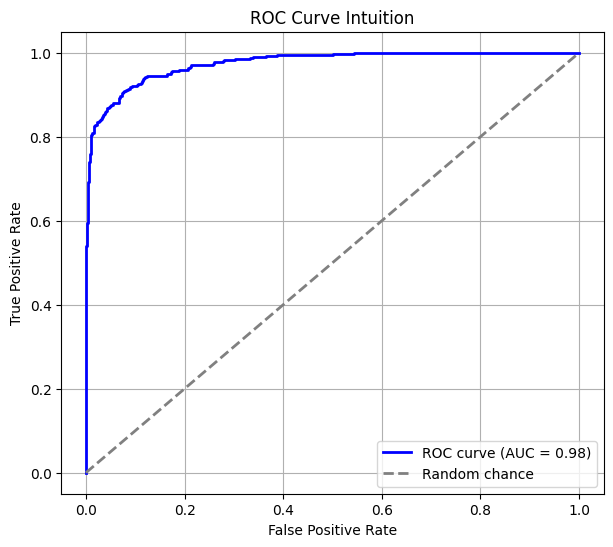

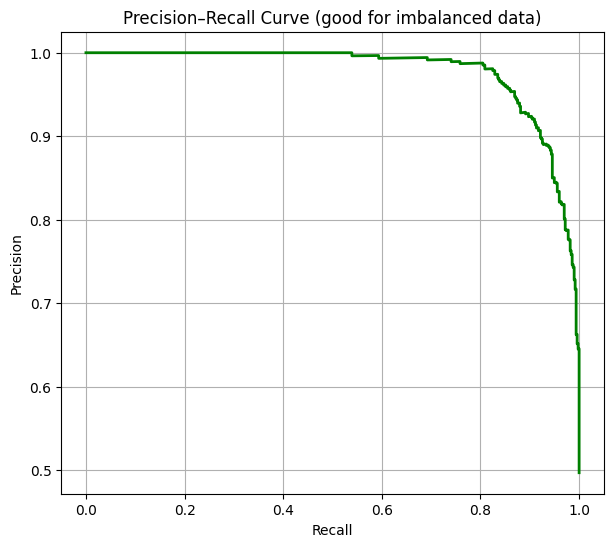

In [ ]:
# ROC & AUC Intuition Demo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 1. Generate synthetic binary classification data
X, y = make_classification(
    n_samples=1000, n_features=10,
    n_informative=3, n_redundant=0,
    random_state=42
)

# 2. Train a simple model
clf = LogisticRegression()
clf.fit(X, y)

# 3. Predict probabilities
y_score = clf.predict_proba(X)[:, 1]

# 4. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_score)
roc_auc = auc(fpr, tpr)

# 5. Plot ROC Curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Random chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Intuition")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 6. Bonus: Precision-Recall Curve for comparison
precision, recall, _ = precision_recall_curve(y, y_score)

plt.figure(figsize=(7, 6))
plt.plot(recall, precision, color="green", lw=2, label="PR curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (good for imbalanced data)")
plt.grid(True)
plt.show()


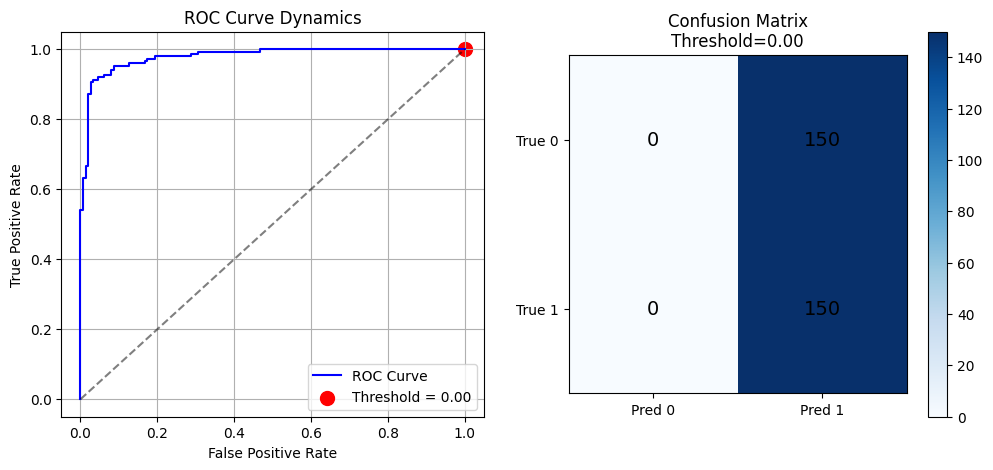

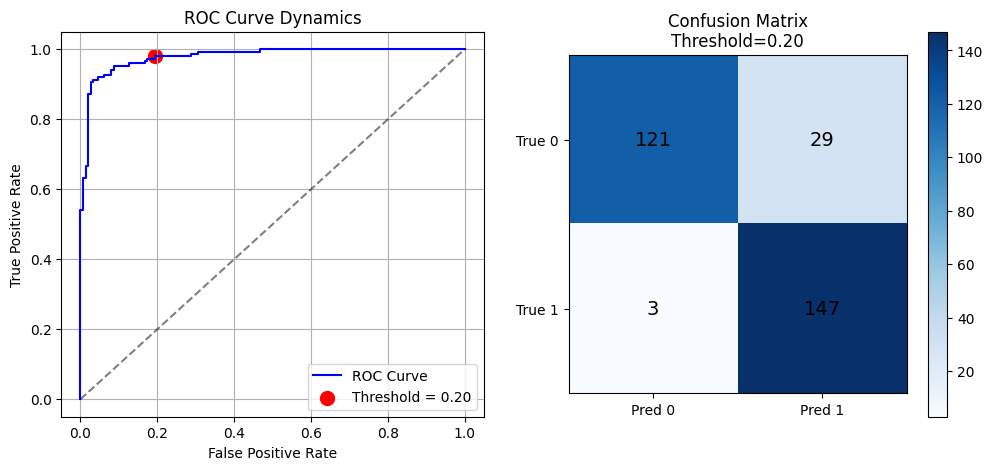

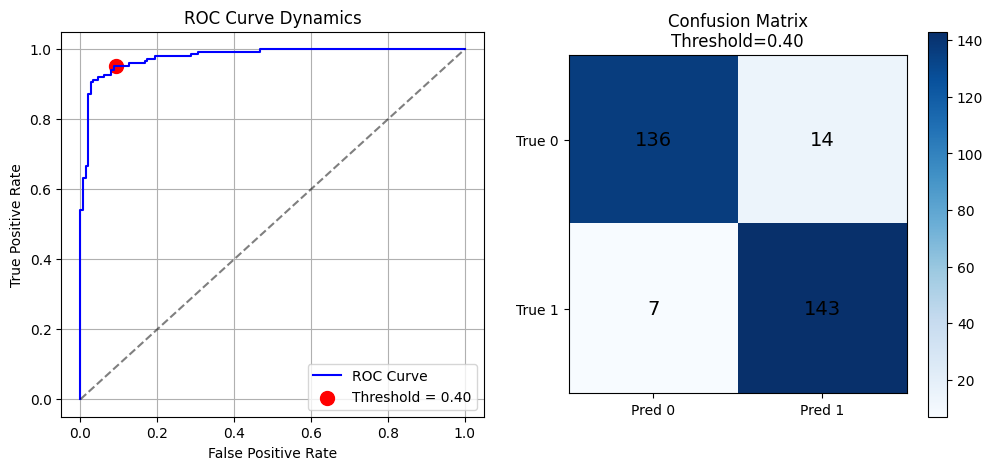

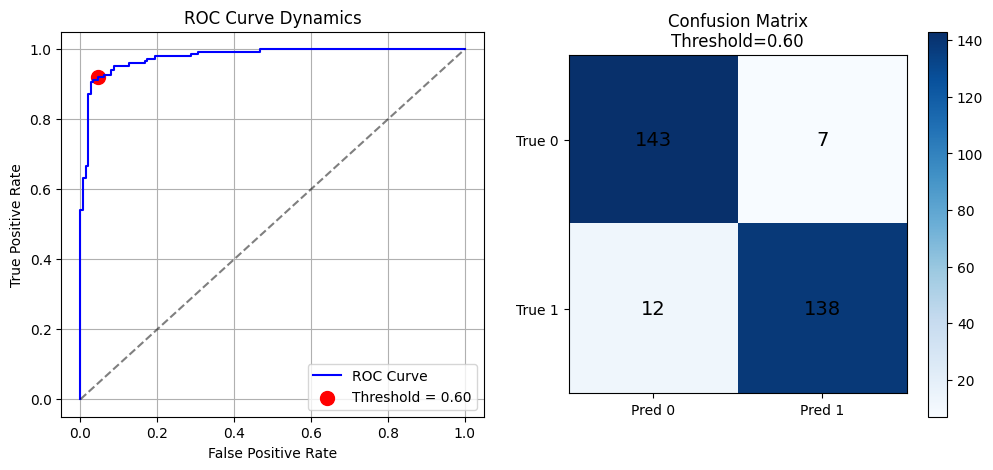

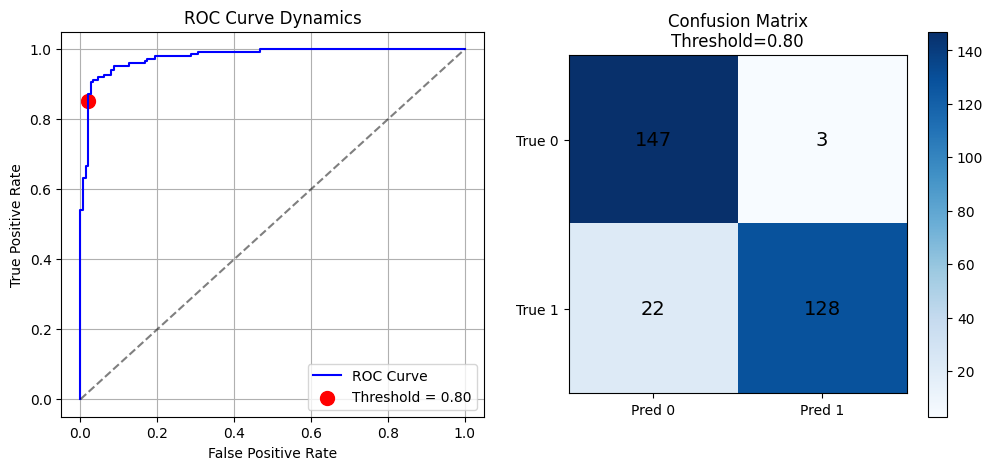

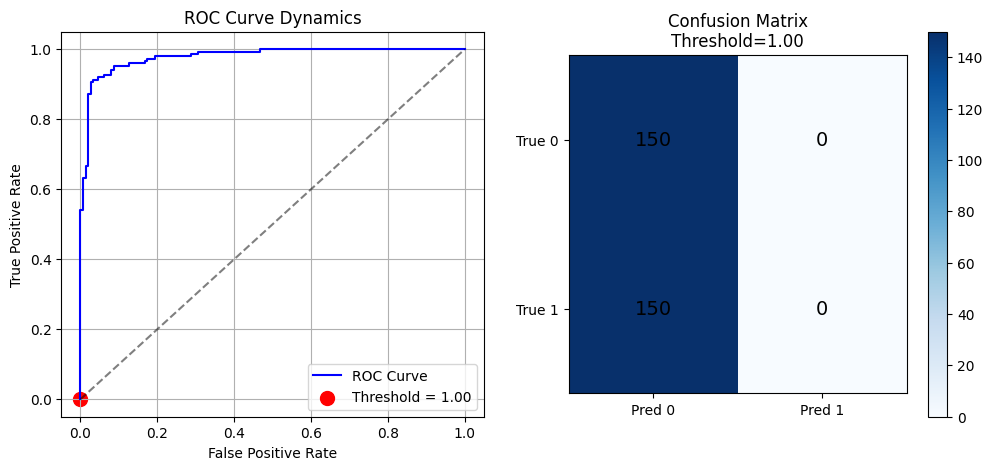

In [ ]:
# Threshold dynamics: ROC point + confusion matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve

# 1. Generate toy data
X, y = make_classification(
    n_samples=300, n_features=5,
    n_informative=2, n_redundant=0,
    random_state=42
)

# 2. Train logistic regression
clf = LogisticRegression()
clf.fit(X, y)
y_score = clf.predict_proba(X)[:, 1]

# 3. ROC curve
fpr, tpr, thresholds = roc_curve(y, y_score)

# 4. Pick thresholds to visualize
thresholds_to_plot = np.linspace(0.0, 1.0, 6)

# 5. Visualization loop
for thr in thresholds_to_plot:
    y_pred = (y_score >= thr).astype(int)
    cm = confusion_matrix(y, y_pred)

    # ROC point at this threshold
    tp = cm[1,1]; fn = cm[1,0]; fp = cm[0,1]; tn = cm[0,0]
    tpr_point = tp / (tp + fn) if (tp+fn) > 0 else 0
    fpr_point = fp / (fp + tn) if (fp+tn) > 0 else 0

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # ROC curve with point
    axs[0].plot(fpr, tpr, label="ROC Curve", color="blue")
    axs[0].plot([0, 1], [0, 1], "k--", alpha=0.5)
    axs[0].scatter(fpr_point, tpr_point, color="red", s=100, label=f"Threshold = {thr:.2f}")
    axs[0].set_xlabel("False Positive Rate")
    axs[0].set_ylabel("True Positive Rate")
    axs[0].set_title("ROC Curve Dynamics")
    axs[0].legend(loc="lower right")
    axs[0].grid(True)

    # Confusion matrix
    im = axs[1].imshow(cm, cmap="Blues")
    for (i, j), val in np.ndenumerate(cm):
        axs[1].text(j, i, f"{val}", ha="center", va="center", fontsize=14)
    axs[1].set_xticks([0, 1]); axs[1].set_yticks([0, 1])
    axs[1].set_xticklabels(["Pred 0", "Pred 1"])
    axs[1].set_yticklabels(["True 0", "True 1"])
    axs[1].set_title(f"Confusion Matrix\nThreshold={thr:.2f}")
    plt.colorbar(im, ax=axs[1])
    plt.show()


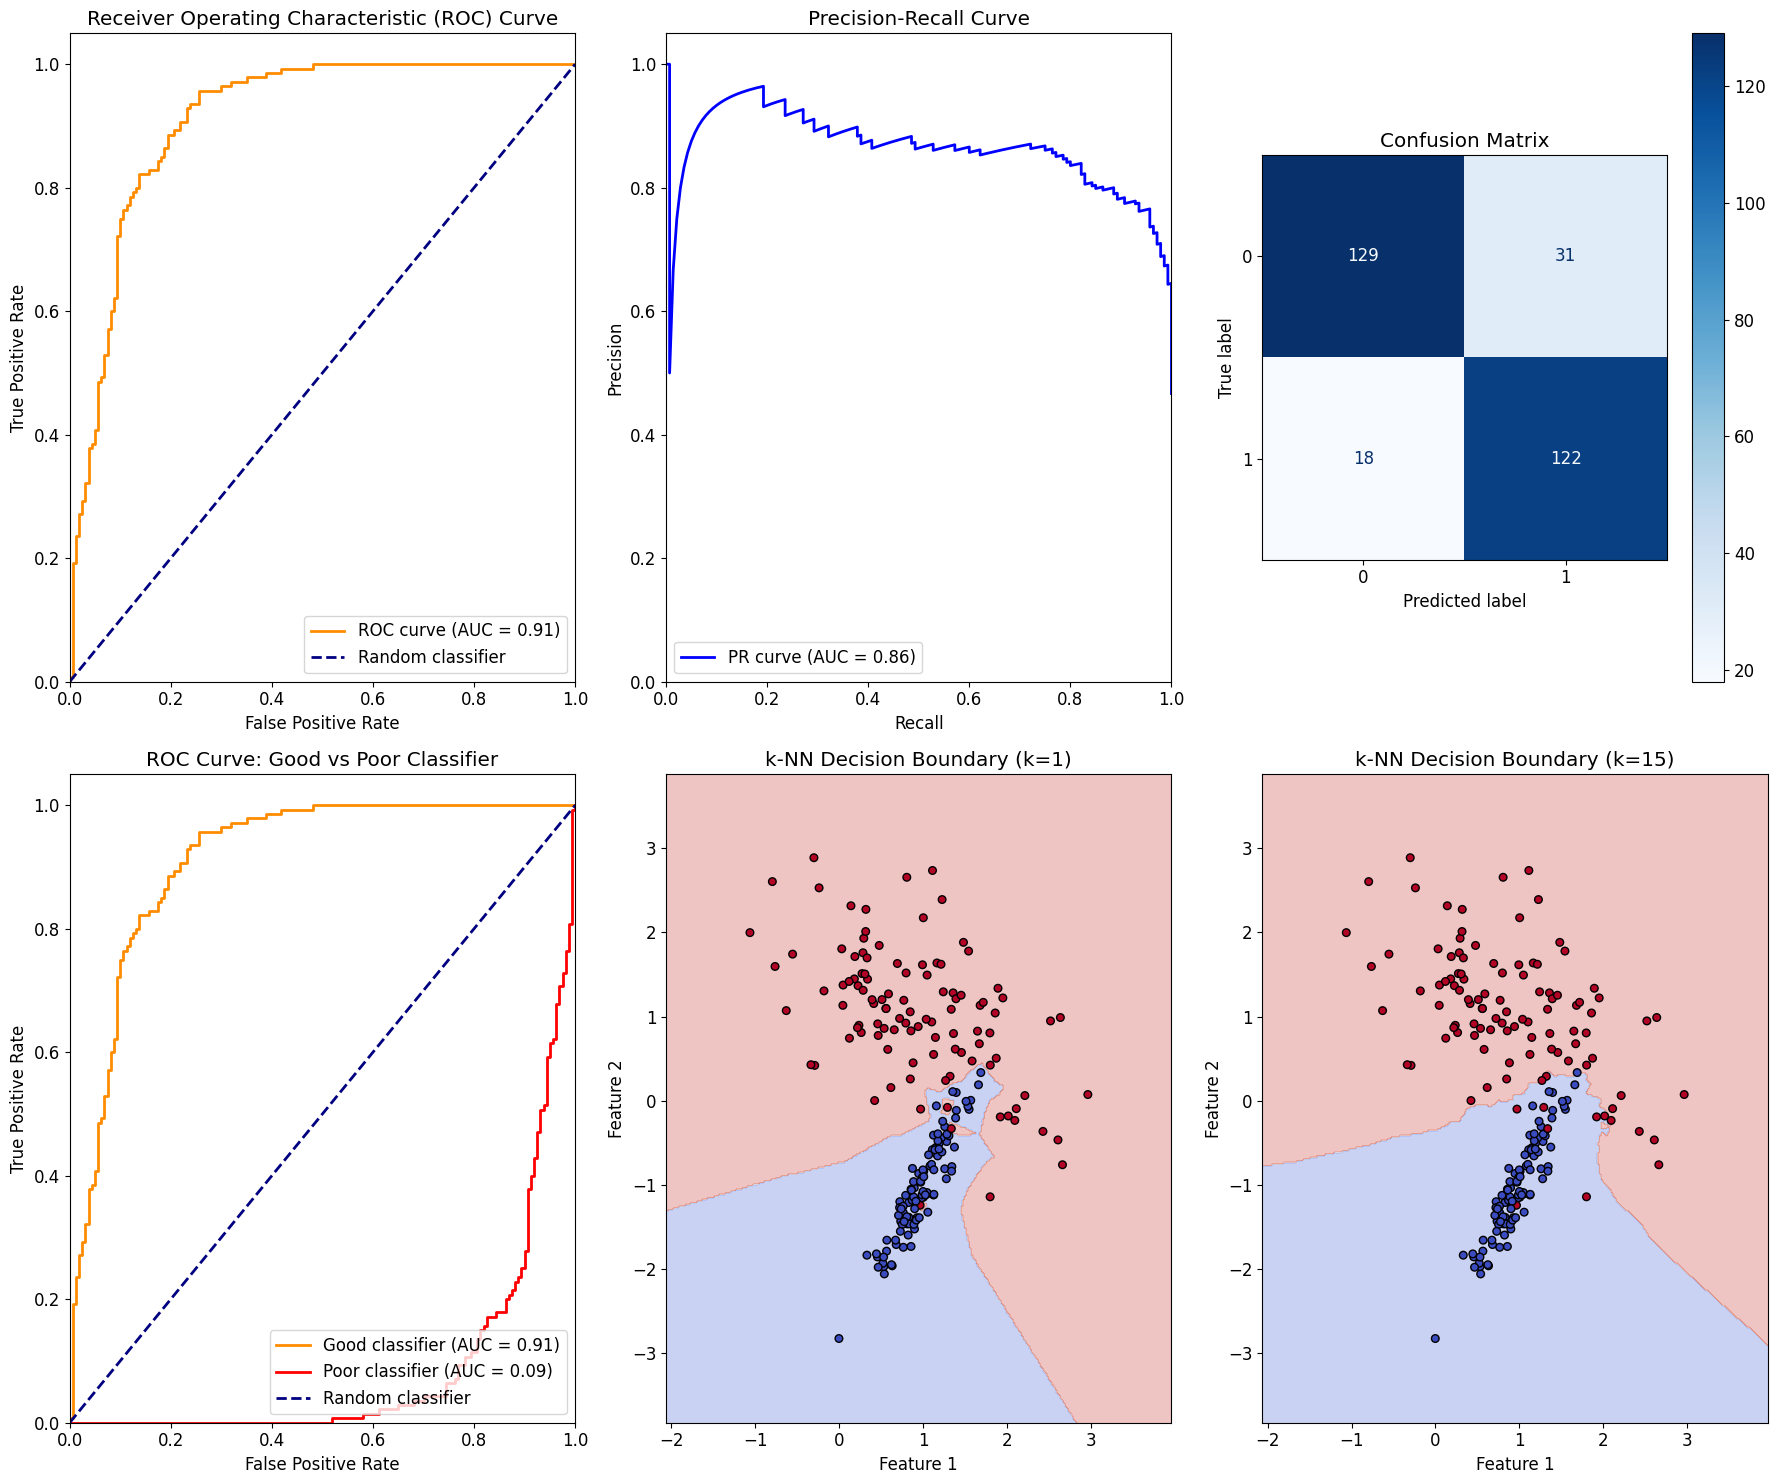

=== Grid Search with Cross-Validation ===
Best parameters: {'C': 0.1}
Best cross-validation score: 0.8442857142857143
Test set score: 0.8366666666666667

=== Additional Classification Metrics ===
Accuracy: 0.837
Precision: 0.797
Recall: 0.871
F1 Score: 0.833

=== k-NN Performance Comparison ===
Logistic Regression Accuracy: 0.837
k-NN Accuracy: 0.917


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Set up the style for our visualizations
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 12

# Generate sample data for binary classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
y_pred = lr_model.predict(X_test)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(18, 15))

# 1. ROC Curve
ax1 = plt.subplot(2, 3, 1)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# 2. Precision-Recall Curve
ax2 = plt.subplot(2, 3, 2)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)

ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")

# 3. Confusion Matrix
ax3 = plt.subplot(2, 3, 3)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax3, cmap='Blues')
ax3.set_title('Confusion Matrix')

# 4. AUC Comparison: Good vs Poor Classifier
ax4 = plt.subplot(2, 3, 4)
# Create a poor classifier by inverting probabilities (for demonstration)
y_pred_prob_poor = 1 - y_pred_prob
fpr_poor, tpr_poor, _ = roc_curve(y_test, y_pred_prob_poor)
roc_auc_poor = auc(fpr_poor, tpr_poor)

ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'Good classifier (AUC = {roc_auc:.2f})')
ax4.plot(fpr_poor, tpr_poor, color='red', lw=2, label=f'Poor classifier (AUC = {roc_auc_poor:.2f})')
ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC Curve: Good vs Poor Classifier')
ax4.legend(loc="lower right")

# 5. k-NN Visualization with different k values
# Create a simple 2D dataset for k-NN visualization
X_knn, y_knn = make_classification(n_samples=300, n_features=2, n_redundant=0,
                                   n_informative=2, random_state=42, n_clusters_per_class=1)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

# Create a mesh to plot the decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train k-NN with different k values - let's just use 2 examples to fit in our grid
k_values = [1, 15]
for i, k in enumerate(k_values):
    ax = plt.subplot(2, 3, 5 + i)  # Positions 5 and 6 in our 2x3 grid
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)

    # Plot the decision boundary
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X_train_knn[:, 0], X_train_knn[:, 1], c=y_train_knn, cmap=plt.cm.coolwarm,
               edgecolors='k', s=30)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f'k-NN Decision Boundary (k={k})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# 6. Hyperparameter Tuning with Grid Search (console output)
print("=== Grid Search with Cross-Validation ===")
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("Test set score:", grid_search.score(X_test, y_test))

# Additional metrics demonstration
print("\n=== Additional Classification Metrics ===")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")

# Comparison with k-NN
print("\n=== k-NN Performance Comparison ===")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"k-NN Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")


REGRESSION METRICS VISUALIZATION


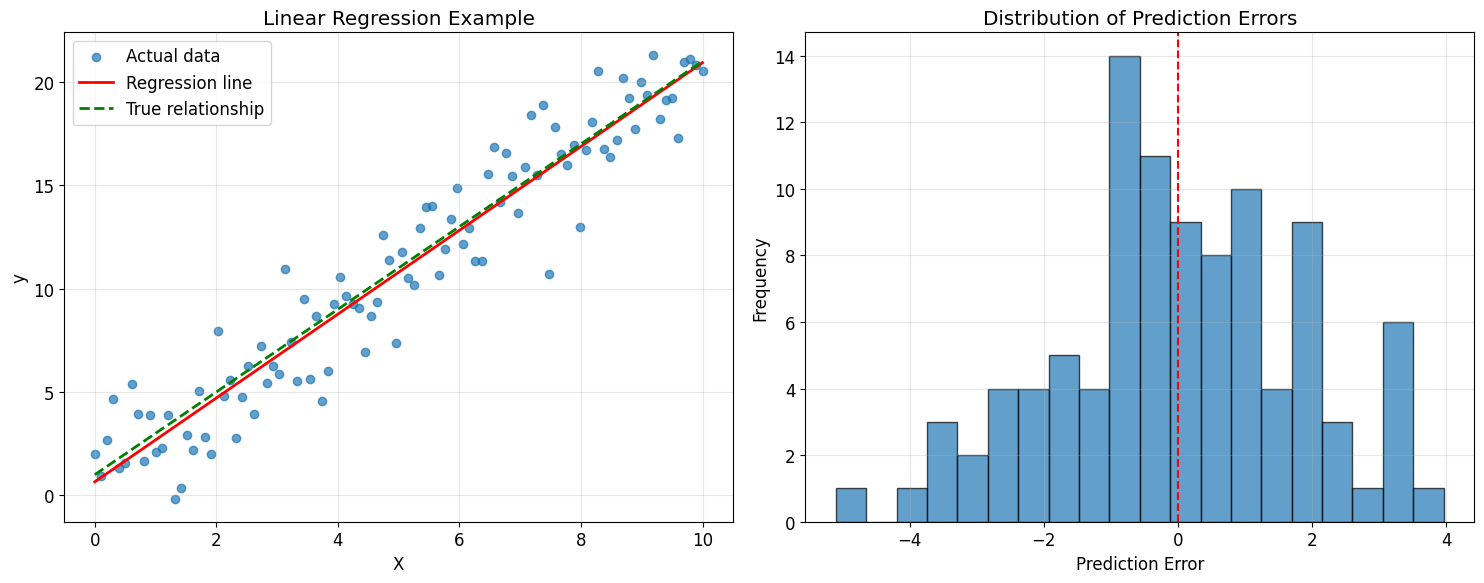

Mean Squared Error (MSE): 3.260
Mean Absolute Error (MAE): 1.430
Root Mean Squared Error (RMSE): 1.805


In [ ]:
# Regression Metrics Visualization
print("\n" + "="*50)
print("REGRESSION METRICS VISUALIZATION")
print("="*50)

# Generate regression data
np.random.seed(42)
X_reg = np.linspace(0, 10, 100)
y_reg_true = 2 * X_reg + 1
y_reg = y_reg_true + np.random.normal(0, 2, 100)  # Add noise

# Fit a linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg_model = LinearRegression()
reg_model.fit(X_reg.reshape(-1, 1), y_reg)
y_reg_pred = reg_model.predict(X_reg.reshape(-1, 1))

# Calculate regression metrics
mse = mean_squared_error(y_reg, y_reg_pred)
mae = mean_absolute_error(y_reg, y_reg_pred)
rmse = np.sqrt(mse)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Regression plot
ax1.scatter(X_reg, y_reg, alpha=0.7, label='Actual data')
ax1.plot(X_reg, y_reg_pred, color='red', linewidth=2, label='Regression line')
ax1.plot(X_reg, y_reg_true, color='green', linestyle='--', linewidth=2, label='True relationship')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Linear Regression Example')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Error distribution
errors = y_reg - y_reg_pred
ax2.hist(errors, bins=20, alpha=0.7, edgecolor='black')
ax2.axvline(x=0, color='red', linestyle='--')
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Prediction Errors')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")